## Dimensionality Reduction using PCA.

### PCA (Principal Component Analysis)

**Definition:** Unsupervised dimensionality reduction that transforms correlated features into **orthogonal principal components (PCs)** maximizing **variance**.

---

**Purpose:** Reduce dimensionality, remove correlation, denoise data, aid visualization.

---

**Key Facts:**  
- PCs are **linear combinations** of original features  
- PCs are **orthogonal** (uncorrelated)  
- PC1 has **maximum variance**, subsequent PCs capture remaining variance  

---

**Mathematics**
$$
X \in \mathbb{R}^{n \times p} \quad \text{(mean-centered data matrix)}
$$

$$
\Sigma = \frac{1}{n} X^T X \quad \text{(covariance matrix)}
$$

$$
\Sigma v_i = \lambda_i v_i \quad
v_i = \text{i-th principal component}, \quad
\lambda_i = \text{variance explained by PC}_i
$$

$$
\text{Explained Variance (PC}_i) = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}
$$

$$
X = U \Sigma V^T \quad \Rightarrow \quad V = \text{matrix of principal components (SVD)}
$$

---


## Against Iris Dataset


### Setup

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

In [ ]:
# Import Data
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
display(
iris_df.describe(),
iris_df.shape,
iris_df.isnull().sum()
)


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(150, 5)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No nulls have been found

---

### Calculating accuracy with PCA

#### Against Raw data

In [ ]:
# Setting features
x = iris_df.drop(columns=['species'])
y = iris_df['species']

In [ ]:
# Train-Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=67)

In [ ]:
# Standardize data
s = StandardScaler()

# If we standardize the data together, the train and test data become dependent and thus model results are skewed.
x_train_s = s.fit_transform(x_train)
x_test_s = s.transform(x_test)

In [ ]:
# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=67)
# fit the model
clf.fit(x_train_s, y_train)
# generate predictions
y_pred = clf.predict(x_test_s)

print("Accuracy on Raw Data: ", metrics.accuracy_score(y_test, y_pred))

Accuracy on Raw Data:  0.9666666666666667


#### Against PCA

In [ ]:
# Applying PCA
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train_s)
x_test_pca = pca.transform(x_test_s)

# Train classifier against PCA data
clf_pca = RandomForestClassifier(n_estimators=100, random_state=67)
clf_pca.fit(x_train_pca, y_train)
y_pred_pca2 = clf_pca.predict(x_test_pca)

print("Accuracy on PCA Data: ", metrics.accuracy_score(y_test, y_pred_pca2))

Accuracy on PCA Data:  0.8333333333333334


Since 2 is not giving a good result, then lets try again with 3 components


In [ ]:
# Applying PCA
pca = PCA(n_components = 3)
x_train_pca = pca.fit_transform(x_train_s)
x_test_pca = pca.transform(x_test_s)

# Train classifier against PCA data
clf_pca = RandomForestClassifier(n_estimators=1000, random_state=67)
clf_pca.fit(x_train_pca, y_train)
y_pred_pca3 = clf_pca.predict(x_test_pca)

print("Accuracy on PCA Data: ", metrics.accuracy_score(y_test, y_pred_pca3))

Accuracy on PCA Data:  0.9


In [ ]:
# Applying PCA
pca = PCA(n_components = 4)
x_train_pca = pca.fit_transform(x_train_s)
x_test_pca = pca.transform(x_test_s)

# Train classifier against PCA data
clf_pca = RandomForestClassifier(n_estimators=100, random_state=67)
clf_pca.fit(x_train_pca, y_train)
y_pred_pca4 = clf_pca.predict(x_test_pca)

print("Accuracy on PCA Data: ", metrics.accuracy_score(y_test, y_pred_pca4))

Accuracy on PCA Data:  0.9


## Against Taxi Data set

### Setup

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

taxi_df = sns.load_dataset('taxis')
taxi_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
display(
    "Info: ",
    taxi_df.info(),
    "Shape: ",
    taxi_df.shape,
    "Describe: ",
    taxi_df.describe(),
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

'Info: '

None

'Shape: '

(6433, 14)

'Describe: '

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [ ]:
taxi_df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [ ]:
df = taxi_df.dropna()
df.shape

(6341, 14)

### Training Data

In [ ]:
encoder = LabelEncoder()
df['payment'] = encoder.fit_transform(df['payment'])
df['payment']

C:\Users\CL509_15\AppData\Local\Temp\ipykernel_14316\2160131453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment'] = encoder.fit_transform(df['payment'])


0       1
1       0
2       1
3       1
4       1
       ..
6428    1
6429    1
6430    0
6431    1
6432    1
Name: payment, Length: 6341, dtype: int64

In [ ]:
x = df[['passengers', 'fare', 'distance', 'total', 'pickup_borough', 'dropoff_borough', 'pickup_zone', 'dropoff_zone']]
x = pd.get_dummies(x, drop_first=True)
y = df[['payment']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_train

,payment
3332,1
860,1
2062,1
1568,0
64,1
...,...
919,1
5269,1
4033,1
237,0


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#### RF against Raw Data

In [ ]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train_scaled, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=1)

In [ ]:
y_pred = rfc.predict(x_test_scaled)
print("Accuracy Without PCA: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Without PCA:  0.7872340425531915


#### Building PCA RFC calculator

In [ ]:
def PCAn(x):
    pca = PCA(n_components = x)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    rfc_pca = RandomForestClassifier(random_state=1)
    rfc_pca.fit(x_train_pca, y_train)

    y_pred_pca = rfc_pca.predict(x_test_pca)
    print("Accuracy With PCA: ", metrics.accuracy_score(y_test, y_pred_pca))

#### RF on PCA2

In [ ]:
PCAn(2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy With PCA:  0.661150512214342


In [ ]:
PCAn(3)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy With PCA:  0.6682427107959023


In [ ]:
PCAn(4)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy With PCA:  0.677698975571316


## Against Digits Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

digits = load_digits()

X = digits.data
y = digits.target

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



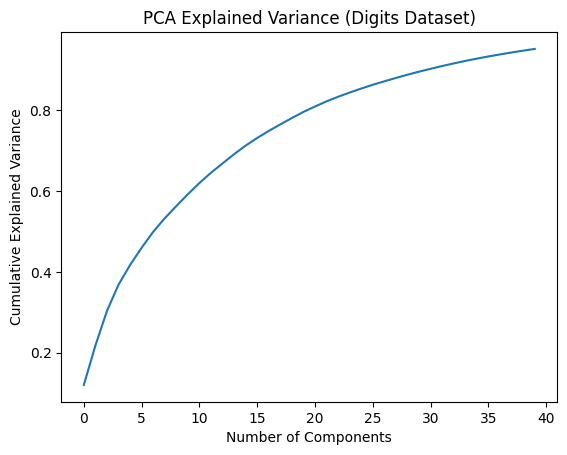

In [4]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# 5. Explained Variance Plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance (Digits Dataset)")
plt.show()

In [5]:
print("Original Features:", X_train.shape[1])
print("Reduced Features:", X_train_pca.shape[1])


model_original = LogisticRegression(max_iter=1000)

model_original.fit(X_train_scaled, y_train)

y_pred_original = model_original.predict(X_test_scaled)

acc_original = accuracy_score(y_test, y_pred_original)


Original Features: 64
Reduced Features: 40


In [7]:
model_pca = LogisticRegression(max_iter=1000)

model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)


# 8. Compare Results
print("\nAccuracy Without PCA:", round(acc_original * 100, 2), "%")
print("Accuracy With PCA:", round(acc_pca * 100, 2), "%")


Accuracy Without PCA: 97.22 %
Accuracy With PCA: 96.11 %
